<a href="https://colab.research.google.com/github/Sanskruti-Shimple/Temperature-Sensor-Failure-Detection-and-Diagnosis-Based-on-the-ARIMA-Model/blob/main/AR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg


In [ ]:
pip install AutoReg

  Created wheel for AutoReg: filename=AutoReg-1.1-py3-none-any.whl size=3660 sha256=17792359ebcf235d3c2f982b1e3fbd69fe43006854efce3b89610ab31cfcf604
  Stored in directory: /root/.cache/pip/wheels/53/a5/a5/8f8a01e75c3f41591330af64c1aa1f6937a09a6876883a5ab9
Successfully built AutoReg


In [ ]:
df=pd.read_xlsx('/content/reading1.xlsx',index_col=0,parse_dates=True)
x=df.values
# print('Shape of data \t',df.Shape)
# print('Orignal Dataset: \n',df_head())
# print('After Extracting only temperature:\n',x)
print(x)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
#
#url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv('/content/AR_Reading.csv')
df['Consumption'].plot()


P-value:  4.7440549018425884e-08


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


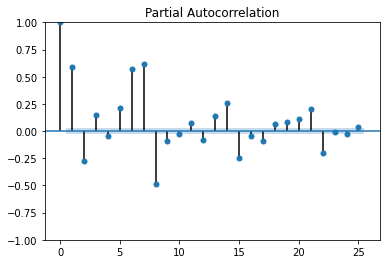

In [ ]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags=25)

In [ ]:
#
# Create training and test data
#
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=8).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Tue, 14 Dec 2021   AIC                          48483.625
Time:                        06:14:48   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

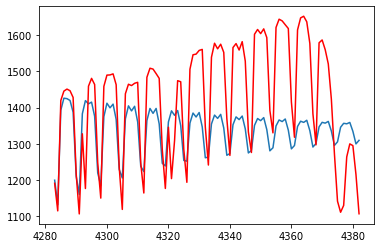

In [ ]:
#
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')